<a href="https://colab.research.google.com/github/kang-narae/AI-DL-DA/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/%EC%8B%9C%EA%B3%84%EC%97%B4%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

In [7]:
raw_data = pd.read_csv('./datasets/samsung210101_220328.csv')
print(raw_data.head())
print(raw_data.info())

         Date     Open     High      Low    Close     Adj Close    Volume
0  2020-01-02  55500.0  56000.0  55000.0  55200.0  51824.093750  12993228
1  2020-01-03  56000.0  56600.0  54900.0  55500.0  52105.750000  15422255
2  2020-01-06  54900.0  55600.0  54600.0  55500.0  52105.750000  10278951
3  2020-01-07  55700.0  56400.0  55600.0  55800.0  52387.410156  10009778
4  2020-01-08  56200.0  57400.0  55900.0  56800.0  53326.250000  23501171
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       552 non-null    object 
 1   Open       552 non-null    float64
 2   High       552 non-null    float64
 3   Low        552 non-null    float64
 4   Close      552 non-null    float64
 5   Adj Close  552 non-null    float64
 6   Volume     552 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 30.3+ KB
None


In [8]:
raw_data['Date']= pd.to_datetime(raw_data['Date'])
raw_data.set_index('Date', inplace=True)
print(raw_data.head())


               Open     High      Low    Close     Adj Close    Volume
Date                                                                  
2020-01-02  55500.0  56000.0  55000.0  55200.0  51824.093750  12993228
2020-01-03  56000.0  56600.0  54900.0  55500.0  52105.750000  15422255
2020-01-06  54900.0  55600.0  54600.0  55500.0  52105.750000  10278951
2020-01-07  55700.0  56400.0  55600.0  55800.0  52387.410156  10009778
2020-01-08  56200.0  57400.0  55900.0  56800.0  53326.250000  23501171


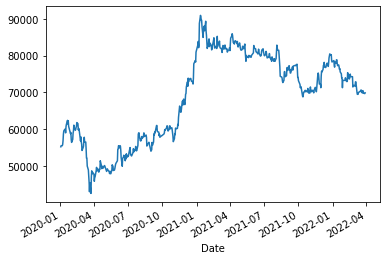

In [10]:
raw_data['Close'].plot()
plt.show()

In [12]:
data_test = raw_data.sort_values('Close')
print(data_test.head())
print(data_test.tail())

               Open     High      Low    Close     Adj Close    Volume
Date                                                                  
2020-03-23  42600.0  43550.0  42400.0  42500.0  39900.800781  41701626
2020-03-19  46400.0  46650.0  42300.0  42950.0  40323.281250  56925513
2020-03-20  44150.0  45500.0  43550.0  45400.0  42623.445313  49730008
2020-03-18  47750.0  48350.0  45600.0  45600.0  42811.214844  40152623
2020-04-01  47450.0  47900.0  45800.0  45800.0  43316.453125  27259532
               Open     High      Low    Close     Adj Close    Volume
Date                                                                  
2021-01-25  87000.0  89900.0  86300.0  89400.0  87796.445313  27258534
2021-01-13  89800.0  91200.0  89100.0  89700.0  88091.062500  36068848
2021-01-14  88700.0  90000.0  88700.0  89700.0  88091.062500  26393970
2021-01-12  90300.0  91400.0  87800.0  90600.0  88974.921875  48682416
2021-01-11  90000.0  96800.0  89500.0  91000.0  89367.742188  90306177


In [21]:
data_close= raw_data[['Close']]
print(data_close.head())

              Close
Date               
2020-01-02  55200.0
2020-01-03  55500.0
2020-01-06  55500.0
2020-01-07  55800.0
2020-01-08  56800.0


In [22]:
minmaxscaler = MinMaxScaler()
scaled_data  = minmaxscaler.fit_transform(data_close)
print(scaled_data[:5])
print(scaled_data.shape)

[[0.26185567]
 [0.26804124]
 [0.26804124]
 [0.2742268 ]
 [0.29484536]]
(552, 1)


In [24]:

sequence_X = []
sequence_Y = []


for i in range(len(scaled_data)-30):  #30일치의 데이터 보고 그다음날 데이터 예측하는 식으로 연습하게 하겠음.
  x= scaled_data[i:i+30]  #한가지만 쭉 봐서 예측하는 건 시계열. 여러가지 (시가 고가 종가 다 쓰면) 다변량 예측.
  y= scaled_data[i+30]
  sequence_X.append(x)
  sequence_Y.append(y)
print(len(scaled_data))
print(sequence_X[0])
print(sequence_Y[0])

552
[[0.26185567]
 [0.26804124]
 [0.26804124]
 [0.2742268 ]
 [0.29484536]
 [0.33195876]
 [0.35051546]
 [0.36082474]
 [0.36082474]
 [0.34020619]
 [0.37525773]
 [0.38762887]
 [0.41030928]
 [0.38969072]
 [0.40824742]
 [0.37731959]
 [0.33608247]
 [0.34226804]
 [0.30309278]
 [0.28659794]
 [0.30309278]
 [0.33814433]
 [0.35051546]
 [0.38350515]
 [0.36907216]
 [0.35463918]
 [0.35876289]
 [0.37113402]
 [0.37525773]
 [0.39793814]]
[0.39175258]


In [26]:
sequence_X = np.array(sequence_X)
sequence_Y = np.array(sequence_Y)
print(sequence_X[0])
print(sequence_Y[0])
print(sequence_X.shape)
print(sequence_Y.shape)

[[0.26185567]
 [0.26804124]
 [0.26804124]
 [0.2742268 ]
 [0.29484536]
 [0.33195876]
 [0.35051546]
 [0.36082474]
 [0.36082474]
 [0.34020619]
 [0.37525773]
 [0.38762887]
 [0.41030928]
 [0.38969072]
 [0.40824742]
 [0.37731959]
 [0.33608247]
 [0.34226804]
 [0.30309278]
 [0.28659794]
 [0.30309278]
 [0.33814433]
 [0.35051546]
 [0.38350515]
 [0.36907216]
 [0.35463918]
 [0.35876289]
 [0.37113402]
 [0.37525773]
 [0.39793814]]
[0.39175258]
(522, 30, 1)
(522, 1)


In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(
    sequence_X, sequence_Y, test_size=0.2)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(417, 30, 1) (417, 1)
(105, 30, 1) (105, 1)


In [28]:
model= Sequential()
model.add(LSTM(50, input_shape=(30, 1), 
               activation='tanh'))   #long short term memory. 얘는 활성화함수로 tanh쓴다.
model.add(Flatten())
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 flatten (Flatten)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [29]:
fit_hist= model.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test), shuffle= False)
#valuedation split은 훈련데이터에서 랜덤하게 몇프로를 뽑아서 그거가지고 매 애폭마다 평가하는 거였지.
# 근데 매 애폭마다 검증셋을 따로 뽑으니까 모든 데이터가 학습될거야
#validation_data는 검증만 해? loss값 찾아서 loss값만 주고 핛브 안해. test data set에 대한 학습은 안돼. 쟤로는 학습 안하고 검증만 한다고. 
# 대신 훈련셋을 매번 다쓰니까 학습이 더 되겠지.
#shuffle false는 랜덤하게 뽑지 않겠다. 순서대로 하라고. 이거 안주면 디폴트값은 랜덤임. 앞부터 순서대로 학습이 아니라 랜덤하게 하나씩 뽑아서함.

Epoch 1/100
14/14 [==============================] - 3s 56ms/step - loss: 0.1303 - val_loss: 0.0306
Epoch 2/100
14/14 [==============================] - 0s 18ms/step - loss: 0.0158 - val_loss: 0.0118
Epoch 3/100
14/14 [==============================] - 0s 17ms/step - loss: 0.0085 - val_loss: 0.0039
Epoch 4/100
14/14 [==============================] - 0s 17ms/step - loss: 0.0039 - val_loss: 0.0034
Epoch 5/100
14/14 [==============================] - 0s 17ms/step - loss: 0.0031 - val_loss: 0.0028
Epoch 6/100
14/14 [==============================] - 0s 18ms/step - loss: 0.0027 - val_loss: 0.0024
Epoch 7/100
14/14 [==============================] - 0s 17ms/step - loss: 0.0025 - val_loss: 0.0022
Epoch 8/100
14/14 [==============================] - 0s 17ms/step - loss: 0.0024 - val_loss: 0.0021
Epoch 9/100
14/14 [==============================] - 0s 17ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 10/100
14/14 [==============================] - 0s 18ms/step - loss: 0.0023 - val_loss: 0.0020

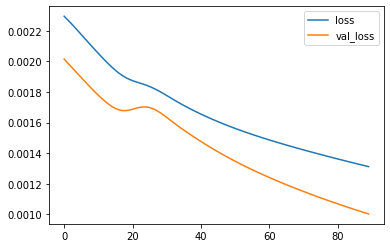

In [32]:
plt.plot(fit_hist.history['loss'][10:], label='loss')
plt.plot(fit_hist.history['val_loss'][10:], label='val_loss')
plt.legend()
plt.show()

In [33]:
model.save('./stock_close_predict.h5')

In [34]:
pred= model.predict(X_test)

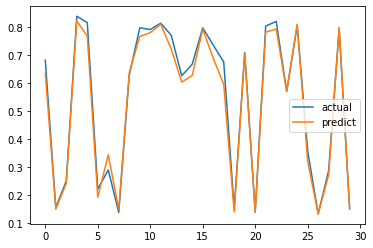

In [36]:
plt.plot(Y_test[:30], label ='actual')
plt.plot(pred[:30], label= 'predict')
plt.legend()
plt.show()

In [41]:
last_data_30= scaled_data[-30:].reshape(1,30,1)

In [42]:
today_close = model.predict(last_data_30)

print(today_close)

[[0.5571547]]


In [43]:
today_close_value = minmaxscaler.inverse_transform(today_close)

In [44]:
print(today_close_value)

[[69522.01]]


In [48]:
today_actual = 70200
today_actual = np.array(today_actual).reshape(1,1)
scaled_today_actual = minmaxscaler.transform(today_actual)
print(scaled_today_actual)


[[0.57113402]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [51]:
last_data_29 = scaled_data[-29:].reshape(1,29,1)
last_30_data= np.append(last_data_29, scaled_today_actual)
last_30_data= last_30_data.reshape(1,30,1)
print(last_30_data.shape)

(1, 30, 1)


In [52]:
tommorrow_pred = model.predict(last_30_data)
tommorrow_predicted_value = minmaxscaler.inverse_transform(tommorrow_pred)

In [55]:
print('%d 원'%tommorrow_predicted_value[0][0])

69554 원
